In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

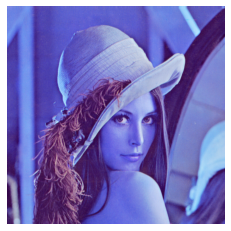

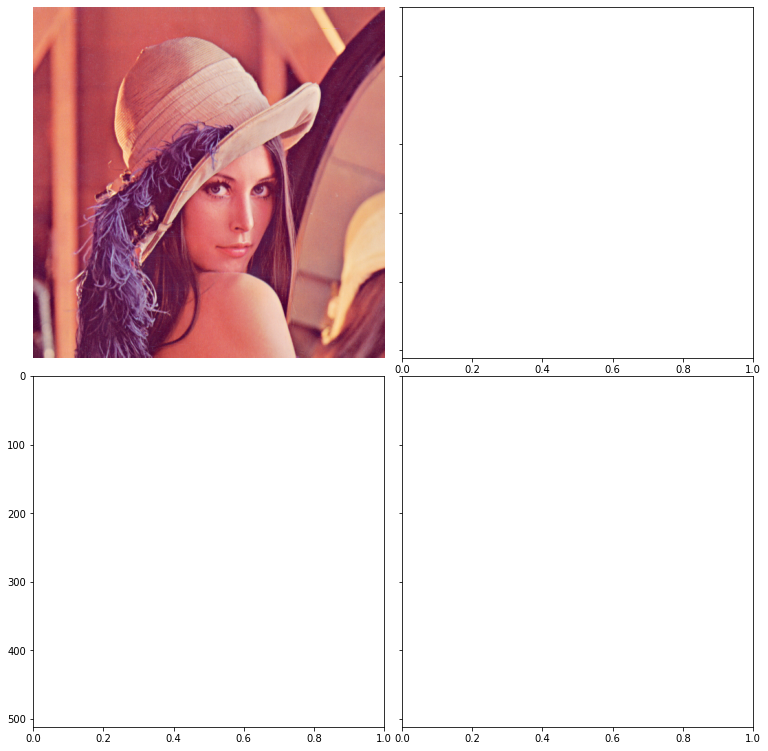

In [22]:
imageFile = '/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png'
imgBGR = cv2.imread(imageFile)
plt.axis('off')
plt.imshow(imgBGR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(2,2, figsize = (10,10), sharey = True)
fig.canvas.manager.set_window_title('sample')

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB, aspect = 'auto')
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, wspace = 0.05, hspace = 0.05)
plt.savefig('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena2.png', bbox_inches= 'tight')


# 비디오 읽기

## opencv

In [23]:
import sys

print(sys.version)

3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) 
[Clang 6.0 (clang-600.0.57)]


In [24]:
import cv2

cap = cv2.VideoCapture(0)
while True:
    retval, frame = cap.read()
    
    if not retval:        
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # edge만 저장
    edges = cv2.Canny(gray,100,200)
    cv2.imshow('edges',edges)   
    #cv2.imshow('frame',frame)
    key = cv2.waitKey(25)
    if key == 27:
        break

if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

In [10]:
# 유튜브에 싫어요 기능이 사라져서 코드 실행이 되지 않음
import pafy
url = 'https://youtu.be/zBeQS8z_2ME'
video = pafy.new(url)

print('title:'+'{}'.format(video.title))

best = video.getbest()

cap = cv2.VideoCapture(best.url)

while True:
    retval, frame = cap.read()
    
    if not retval:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,100,200)
    cv2.imshow('edges',edges)
    cv2.imshow('frame',frame)
    key = cv2.waitKey(25)
    if key == 27:
        break

if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

KeyError: 'dislike_count'

In [25]:
# 찍은 영상 저장
import cv2

cap = cv2.VideoCapture(0)
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
             int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame size =',frame_size)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
path = '/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/'
out1 = cv2.VideoWriter(path+'test.mp4',fourcc, 20.0, frame_size)
out2 = cv2.VideoWriter(path+'test2.mp4',fourcc, 20.0, frame_size, isColor=False)

while True:
    retval, frame = cap.read()
    
    if not retval:        
        break

    out1.write(frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out2.write(gray)
    
    cv2.imshow('gray', gray)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()

frame size = (1280, 720)


## matplotlib

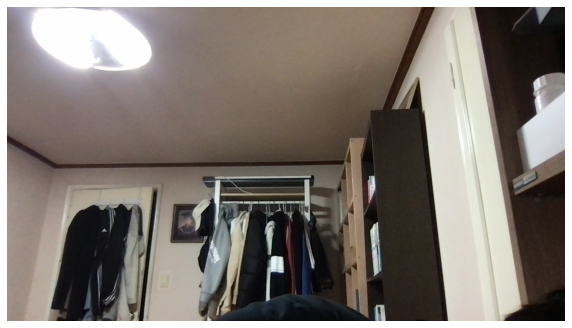

In [27]:
import cv2
import matplotlib.pyplot as plt

def handle_key_press(event):
    if event.key == 'escape':
        cap.release()
        plt.close()

def handle_close(evt):
    print('close figure')
    cap.release()

cap = cv2.VideoCapture(0)

plt.ion()
fig = plt.figure(figsize=(10,6))
plt.axis('off')
fig.canvas.manager.set_window_title('Video capture')
fig.canvas.mpl_connect('key_press_event', handle_key_press)
fig.canvas.mpl_connect('handle_close', handle_close)
retval, frame = cap.read()
im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

while True:
    retval, frame = cap.read()
    
    if not retval:        
        break

    im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    cv2.imshow('gray', gray)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

# 도형 그리기

In [13]:
import cv2
import numpy as np

img = np.zeros(shape=(512,512,3), dtype = np.uint8) + 255

x1,x2 = 100,400
y1,y2 = 100,400
cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255))

pt1 = 120,50
pt2 = 300,500
cv2.line(img, pt1, pt2, (255,0,0), 2)

imgRect = (x1,y1, x2-x1, y2-y1)
retval, rpt1, rpt2 = cv2.clipLine(imgRect, pt1, pt2)
if retval:
    cv2.circle(img, rpt1, radius = 5, color = (0,255,0), thickness = -1)
    cv2.circle(img, rpt2, radius = 5, color = (0,255,0), thickness = -1)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

# 트랙바 이벤트 처리

In [15]:
def onChange(pos):
    global img
    r = cv2.getTrackbarPos('R', 'img')
    g = cv2.getTrackbarPos('G', 'img')
    b = cv2.getTrackbarPos('B', 'img')
    img[:] = (b,g,r)
    cv2.imshow('img', img)

img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('img', img)

cv2.createTrackbar('R', 'img', 0, 255, onChange)
cv2.createTrackbar('G', 'img', 0, 255, onChange)
cv2.createTrackbar('B', 'img', 0, 255, onChange)

cv2.setTrackbarPos('R', 'img', 0)
cv2.setTrackbarPos('G', 'img', 0)
cv2.setTrackbarPos('B', 'img', 255)

cv2.waitKey()
cv2.destroyAllWindows()

# 다중선택

In [22]:
import cv2

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png', cv2.IMREAD_GRAYSCALE)
rects = cv2.selectROIs('src', src, False, True)
print('rects:', rects)

for r in rects:
    cv2.rectangle(src,(r[0], r[1]), (r[0]+r[2], r[1]+r[3]),255)
    
cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

rects: [[237 243  46  28]
 [284 239  60  28]
 [270 296  40  24]
 [254 329  64  40]]


In [32]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png')
b,g,r = cv2.split(src)
dst = cv2.merge([b,g,r])
cv2.imshow('merged',dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ycrcv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('test', ycrcv)
cv2.imshow('test2', hsv)
cv2.waitKey()
cv2.destroyAllWindows()

# 산술연산, 비트연산

In [46]:
import cv2
import numpy as np

src1 = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.png')
src2 = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/opencv_logo.png')
cv2.imshow('src2',src2)

rows, cols, channels = src2.shape
roi = src1[0:rows, 0:cols]

# 전경과 배경을 분리하고 전경을 반전시킴
gray = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask',mask)
cv2.imshow('mask_inv',mask_inv)

src1_bg = cv2.bitwise_and(roi, roi, mask=mask)
cv2.imshow('src_bg', src1_bg)

src2_fg = cv2.bitwise_and(src2, src2, mask=mask_inv)
cv2.imshow('src2_fg', src2_fg)

dst = cv2.bitwise_or(src1_bg, src2_fg)
cv2.imshow('dst', dst)

src1[0:rows, 0:cols] = dst

cv2.imshow('result', src1)
cv2.waitKey()
cv2.destroyAllWindows()

# 수학 및 통계함수

In [55]:
import cv2
import numpy as np

src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)

# 100,200 사이로 정규화
dst = cv2.normalize(gray, None, 100, 200, cv2.NORM_MINMAX)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)
print('dst:', minVal, maxVal, minLoc, maxLoc)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

dst: 100.0 200.0 (264, 198) (117, 272)


In [58]:
# 3 채널 컬러 영상의 PCA 투영
src = cv2.imread('/Users/yongchanchun/Desktop/데스크탑 - MacBook Pro/computer vision/lena.jpg')
b, g, r = cv2.split(src)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)

X = src.reshape(-1,3)
print('X.shape=', X.shape)

mean, eVects = cv2.PCACompute(X, mean=None)
print('mean=', mean)
print('evects=', eVects)

Y = cv2.PCAProject(X, mean, eVects)
Y = Y.reshape(src.shape)
print('Y.shape=', Y.shape)

eImage = list(cv2.split(Y))
for i in range(3):
    cv2.normalize(eImage[i], eImage[i], 0, 255, cv2.NORM_MINMAX)
    eImage[i] = eImage[i].astype(np.uint8)

cv2.imshow('eImage[0]', eImage[0])
cv2.imshow('eImage[1]', eImage[1])
cv2.imshow('eImage[2]', eImage[2])
cv2.waitKey()
cv2.destroyAllWindows()

X.shape= (262144, 3)
mean= [[105.40396  99.0518  180.21017]]
evects= [[ 0.3985049   0.6855065   0.6093233 ]
 [-0.6381082  -0.26997676  0.7210622 ]
 [ 0.658796   -0.6761608   0.32984018]]
Y.shape= (512, 512, 3)
